In [1]:
dataset = "online_retail_II.csv"

### Importing required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
from numpy import math

pd.set_option("display.max_columns", 50)

In [3]:
retail_df=pd.read_csv(dataset)
retail_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
# shape of dataset
retail_df.shape

(1067371, 8)

In [5]:
# checking the datatypes and null values in dataset
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [6]:
# Checking for Null values
retail_df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

Observations:
- Datatype of InvoiceDate is object need to convert it into datatime.
- There are null values in CustomerID and Description.

Customer ID is our Identification feature and Description has Product description.

The RFM analysis and KMeans Clustering can not be done without Customer ID values.

Hence, droppingg the missing values

In [7]:
retail_df.dropna(subset=['Customer ID'],inplace=True)


In [8]:
retail_df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [9]:
retail_df.describe()

,Quantity,Price,Customer ID
count,824364.000000,824364.000000,824364.000000
mean,12.414574,3.676800,15324.638504
std,188.976099,70.241388,1697.464450
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13975.000000
50%,5.000000,1.950000,15255.000000
75%,12.000000,3.750000,16797.000000
max,80995.000000,38970.000000,18287.000000


We can see that Quantity and Price columns have negative values, lets explore these entries

In [10]:
retail_df[retail_df['Quantity']<0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


Invoice numbers start with C and as per description of data these are cancellations hence dropping these entries

In [11]:
# changing the datatype to str
retail_df['Invoice'] = retail_df['Invoice'].astype('str')

In [12]:
retail_df=retail_df[~retail_df['Invoice'].str.contains('C')]

In [13]:
retail_df[retail_df['Price']<=0].sort_values('Price')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
4674,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.0,16126.0,United Kingdom
840208,564651,22955,36 FOIL STAR CAKE CASES,144,2011-08-26 14:19:00,0.0,14646.0,Netherlands
840207,564651,23268,SET OF 2 CERAMIC CHRISTMAS REINDEER,192,2011-08-26 14:19:00,0.0,14646.0,Netherlands
840206,564651,23270,SET OF 2 CERAMIC PAINTED HEARTS,96,2011-08-26 14:19:00,0.0,14646.0,Netherlands
823515,562973,23157,SET OF 6 NATIVITY MAGNETS,240,2011-08-11 11:42:00,0.0,14911.0,EIRE
...,...,...,...,...,...,...,...,...
327801,521375,22202,MILK PAN PINK RETROSPOT,3,2010-09-05 11:58:00,0.0,12647.0,Germany
296375,518231,22472,TV DINNER TRAY DOLLY GIRL,9,2010-08-05 15:28:00,0.0,12471.0,Germany
276858,516304,22690,DOORMAT HOME SWEET HOME BLUE,6,2010-07-19 13:13:00,0.0,14025.0,United Kingdom
400047,527696,22121,NOEL WOODEN BLOCK LETTERS,1,2010-10-18 15:13:00,0.0,13554.0,United Kingdom


We observe that these are not product purchase transactions but transactions of store related to some debt hence also deopping these entries

In [14]:
# taking price values greater than 0.
retail_df=retail_df[retail_df['Price']>0]
retail_df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [15]:
retail_df.shape


(805549, 8)

Our data got reduced now we have 1041671 datapoints

In [16]:
retail_df.describe()

,Quantity,Price,Customer ID
count,805549.000000,805549.000000,805549.000000
mean,13.290522,3.206561,15331.954970
std,143.634088,29.199173,1696.737039
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13982.000000
50%,5.000000,1.950000,15271.000000
75%,12.000000,3.750000,16805.000000
max,80995.000000,10953.500000,18287.000000


## Feature Engineering:

In [17]:
# Converting InvoiceDate to datetime. InvoiceDate is in format of 01-12-2010 08:26:33.
retail_df["InvoiceDate"] = pd.to_datetime(retail_df["InvoiceDate"], format="%Y-%m-%d %H:%M:%S")


In [18]:
retail_df["year"] = retail_df["InvoiceDate"].apply(lambda x: x.year)
retail_df["month_num"] = retail_df["InvoiceDate"].apply(lambda x: x.month)
retail_df["day_num"] = retail_df["InvoiceDate"].apply(lambda x: x.day)
retail_df["hour"] = retail_df["InvoiceDate"].apply(lambda x: x.hour)
retail_df["minute"] = retail_df["InvoiceDate"].apply(lambda x: x.minute)
retail_df["second"] = retail_df["InvoiceDate"].apply(lambda x: x.second)

In [19]:
# extracting month from the Invoice date
retail_df['Month']=retail_df['InvoiceDate'].dt.month_name()

In [20]:
# extracting day from the Invoice date
retail_df['Day']=retail_df['InvoiceDate'].dt.day_name()

Making total amount column by multiplying quantity with price

In [21]:
retail_df['TotalAmount']=retail_df['Quantity']*retail_df['Price']

In [22]:
retail_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,year,month_num,day_num,hour,minute,second,Month,Day,TotalAmount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,12,1,7,45,0,December,Tuesday,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,1,7,45,0,December,Tuesday,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,1,7,45,0,December,Tuesday,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,12,1,7,45,0,December,Tuesday,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,12,1,7,45,0,December,Tuesday,30.0


## EDA:

In [23]:
retail_df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'year', 'month_num', 'day_num',
       'hour', 'minute', 'second', 'Month', 'Day', 'TotalAmount'],
      dtype='object')

### TOP 10 HIGHEST SELLING PRODUCTS SOLD BY THE STORE

In [24]:
df1=retail_df.groupby('Description').agg({'Quantity': 'sum'}) # Only sum the 'Quantity' column
df1.sort_values(['Quantity'], ascending=False,inplace=True)
df1.reset_index(inplace=True)
df1.rename(columns={'Description':'Product_name'},inplace=True)
df2=df1[['Product_name','Quantity']][:10]
df2

,Product_name,Quantity
0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,109169
1,WHITE HANGING HEART T-LIGHT HOLDER,93640
2,"PAPER CRAFT , LITTLE BIRDIE",80995
3,ASSORTED COLOUR BIRD ORNAMENT,79913
4,MEDIUM CERAMIC TOP STORAGE JAR,77916
5,JUMBO BAG RED RETROSPOT,75759
6,BROCADE RING PURSE,71129
7,PACK OF 60 PINK PAISLEY CAKE CASES,55270
8,60 TEATIME FAIRY CAKE CASES,53495
9,PACK OF 72 RETROSPOT CAKE CASES,46107


Text(0.5, 1.0, 'Top 10 products by quantity')

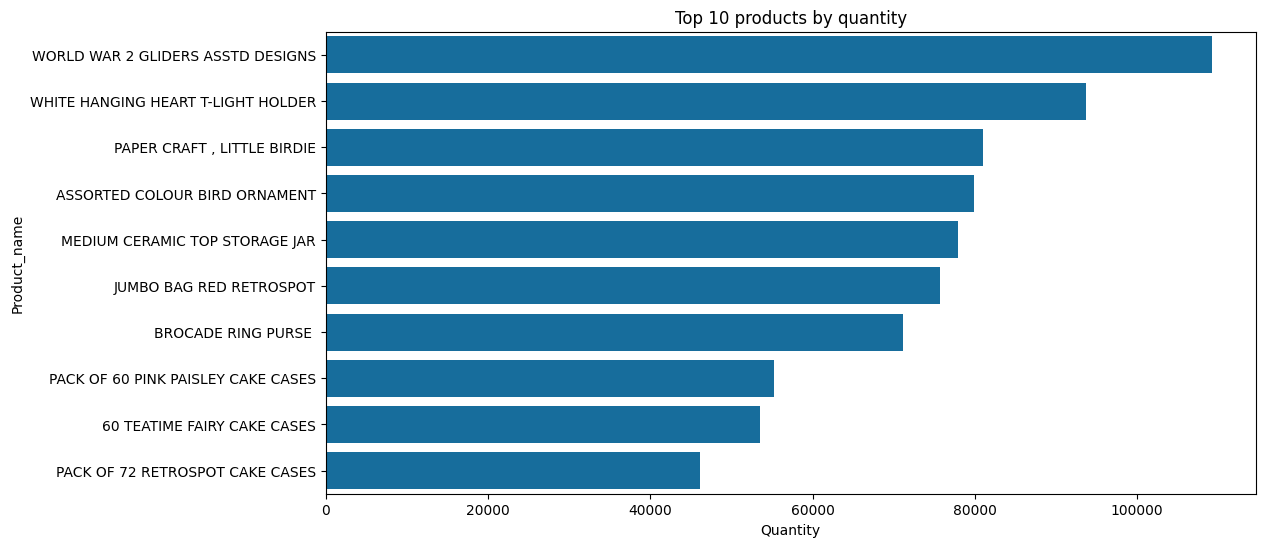

In [25]:
# top 10 products by quantity
sns.set_palette('colorblind')
plt.figure(figsize=(12,6))
sns.barplot(x=df2['Quantity'],y=df2['Product_name'])
plt.title('Top 10 products by quantity')

Observations:
- WORLD WAR 2 GLIDERS ASSTD DESIGNS was the highest selling product
- WHITE HANGING HEART T-LIGHT HOLDER was the second highest selling product



### 10 LEAST SELLING PRODUCTS OF THE STORE

In [26]:
df3=df1[['Product_name','Quantity']].tail(10)
df3

,Product_name,Quantity
5273,WHITE SCANDINAVIAN HEART CHRISTMAS,1
5274,ENGLISH ROSE TEA FOR ONE GIFT BOX,1
5275,OWLS CHARLOTTE BAG,1
5276,F FAIRY POTPOURRI CUSHIONS SUMMER,1
5277,"F.FAIRY S/3 SML CANDLE, LAVENDER",1
5278,"F.FAIRY S/3 SML CANDLE, ROSE",1
5279,"F.FAIRY S/3 SML CANDLE,LILY/VALLEY",1
5280,VINTAGE METAL CAKE STAND CREAM,1
5281,"F.FAIRY,CANDLE IN GLASS,LILY/VALLEY",1
5282,RUSSIAN FOLKART STACKING TINS,1


These are the least selling products of the store with only 1 unit sold of each product

### TOP 10 STOCKCODES BY QUANTITY

In [27]:
df4=retail_df.groupby('StockCode').agg({'Quantity': 'sum'}) # Only sum the 'Quantity' column
df4.sort_values(['Quantity'], ascending=False,inplace=True)
df4.reset_index(inplace=True)
df5=df4[['StockCode','Quantity']][:10]
df5

,StockCode,Quantity
0,84077,109169
1,85099B,94983
2,85123A,93697
3,21212,91263
4,23843,80995
5,84879,79913
6,22197,77971
7,23166,77916
8,17003,71129
9,21977,55270


Text(0.5, 1.0, 'Top 10 StockCodes by quantity')

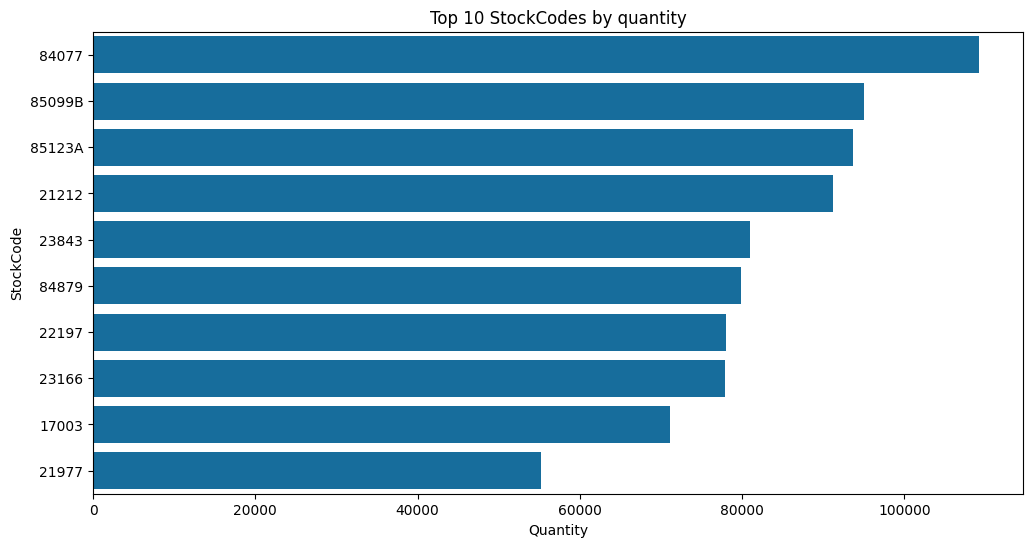

In [28]:
# top 10 StockCodes by quantity
plt.figure(figsize=(12,6))
sns.set_palette('colorblind')
sns.barplot(x=df5['Quantity'],y=df5['StockCode'])
plt.title('Top 10 StockCodes by quantity')

### TOP 10 HIGHEST SPENDING CUSTOMERS

In [29]:
Top10Spending=retail_df.groupby('Customer ID')['TotalAmount'].sum().reset_index().sort_values('TotalAmount',ascending=False).head(10)
Top10Spending

,Customer ID,TotalAmount
5692,18102.0,608821.65
2277,14646.0,528602.52
1789,14156.0,313946.37
2538,14911.0,295972.63
5050,17450.0,246973.09
1331,13694.0,196482.81
5109,17511.0,175603.55
4061,16446.0,168472.50
4295,16684.0,147142.77
68,12415.0,144458.37


Text(0.5, 1.0, 'Top 10 Spending Customers.')

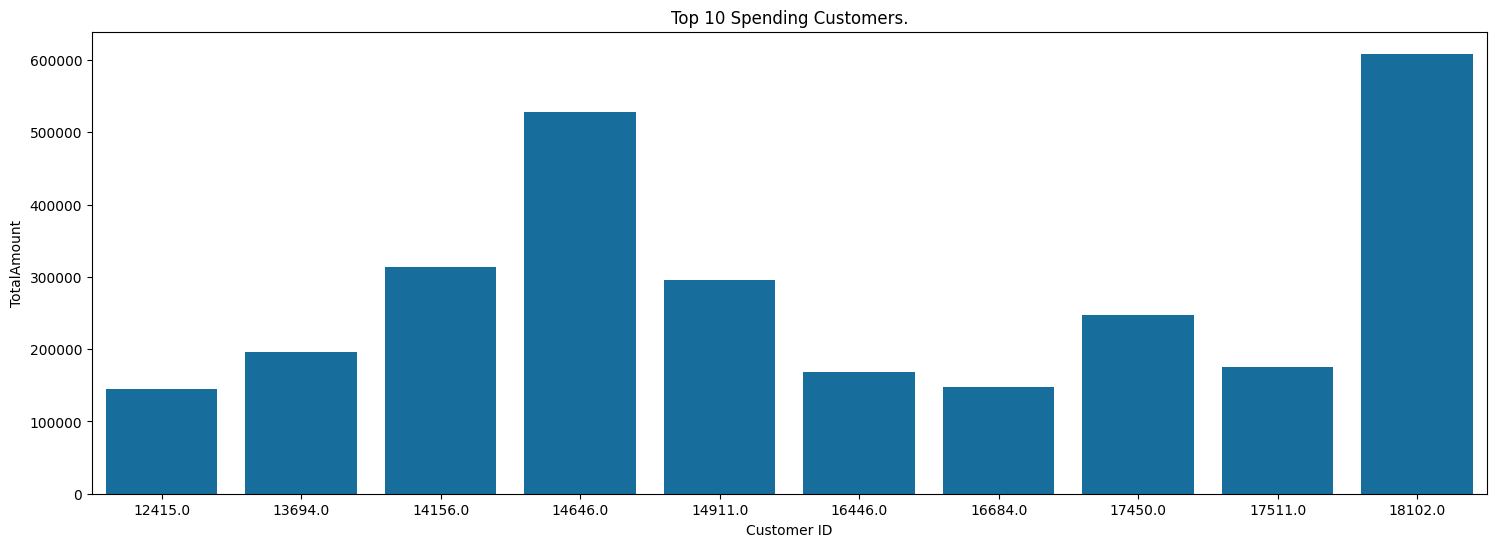

In [30]:
# Top 10 Spending Customers
plt.figure(figsize=(18,6))
sns.barplot(x=Top10Spending['Customer ID'],y=Top10Spending['TotalAmount'].head(10))
plt.title('Top 10 Spending Customers.')

In [31]:
# Convert Customer ID and TotalAmount to integers
Top10Spending['Customer ID'] = Top10Spending['Customer ID'].astype(int)
Top10Spending['TotalAmount'] = Top10Spending['TotalAmount'].astype(int)

In [32]:
Top10Spending

,Customer ID,TotalAmount
5692,18102,608821
2277,14646,528602
1789,14156,313946
2538,14911,295972
5050,17450,246973
1331,13694,196482
5109,17511,175603
4061,16446,168472
4295,16684,147142
68,12415,144458


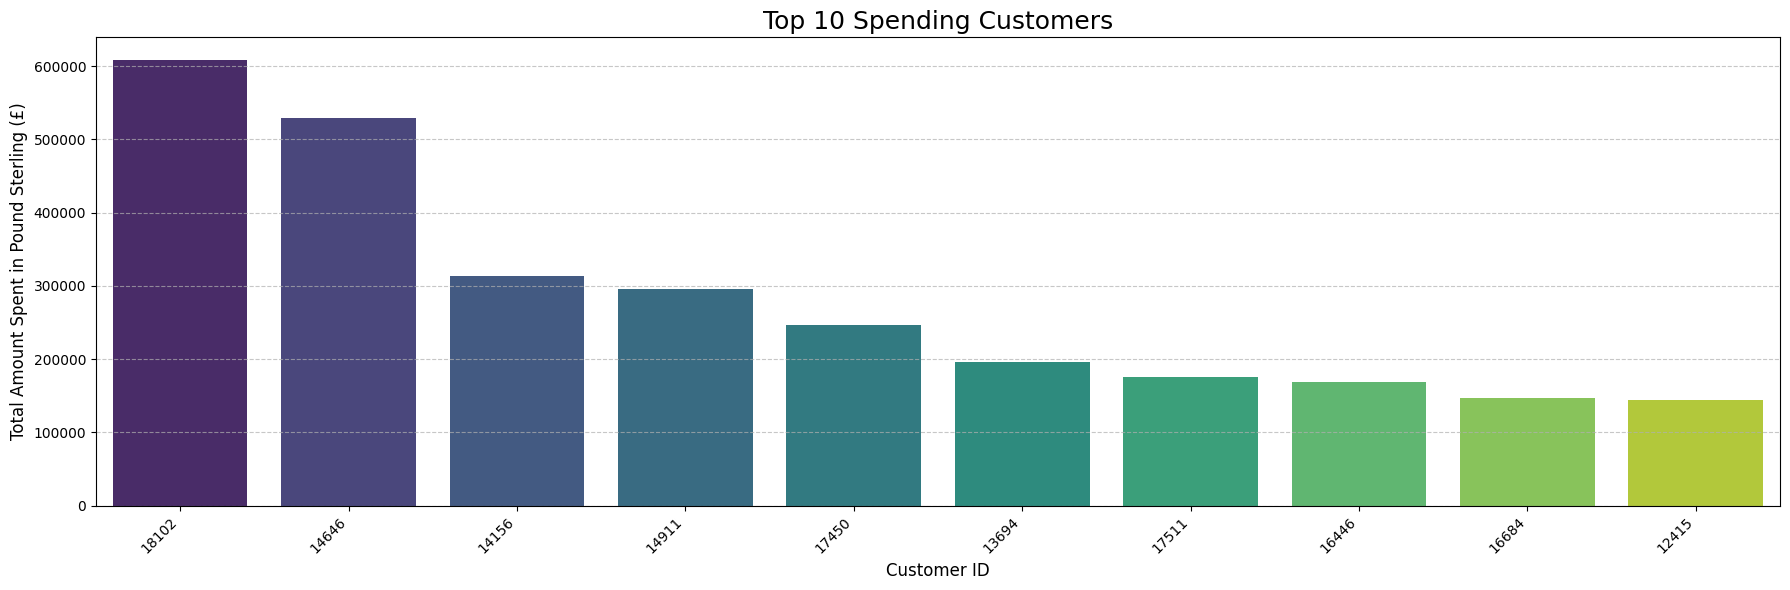

In [33]:
plt.figure(figsize=(18, 6))
sns.barplot(x='Customer ID', y='TotalAmount', data=Top10Spending, palette='viridis',order=Top10Spending['Customer ID'])
plt.title('Top 10 Spending Customers', fontsize=18)
plt.xlabel('Customer ID', fontsize=12)
plt.ylabel('Total Amount Spent in Pound Sterling (£)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding grid
plt.tight_layout()
plt.show()

### TOP 10 MOST FREQUENT CUSTOMERS

In [34]:
Top10Frequent=retail_df['Customer ID'].value_counts().reset_index().rename(columns={'index':'Customer ID','Customer ID':'Frequency'}).head(10)
Top10Frequent

,Frequency,count
0,17841.0,12890
1,14911.0,11245
2,12748.0,7228
3,14606.0,6566
4,14096.0,5111
5,15311.0,4434
6,14156.0,4048
7,14646.0,3849
8,13089.0,3362
9,16549.0,3250


We observe that both lists have 3 Customer IDs common imptlying most frequent customers tend to be the most spending customers

### TOP 10 CUSTOMERS BY AVERAGE ORDER AMOUNT

In [35]:
avg_amount=retail_df.groupby('Customer ID')['TotalAmount'].mean().reset_index().rename(columns={'TotalAmount':'Avg_amount_per_customer'}).sort_values('Avg_amount_per_customer',ascending=False).head(10)

In [36]:
avg_amount

,Customer ID,Avg_amount_per_customer
4061,16446.0,56157.500000
2722,15098.0,13305.500000
569,12918.0,10953.500000
3382,15760.0,6958.170000
3371,15749.0,4453.430000
2819,15195.0,3861.000000
854,13205.0,2803.200000
0,12346.0,2281.072353
5438,17846.0,2033.100000
2826,15202.0,2000.496667


Text(0.5, 1.0, 'Average amount spent by each Customer')

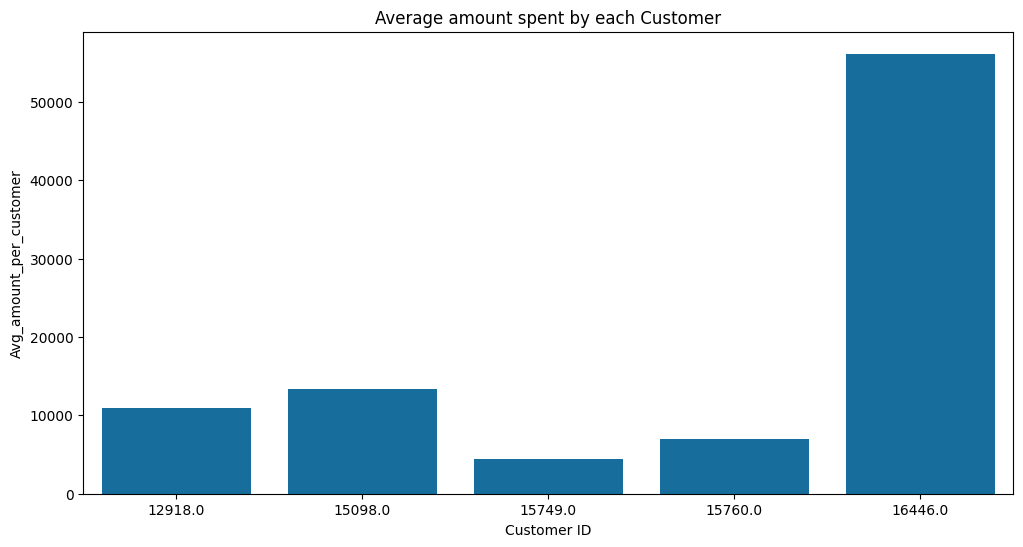

In [37]:
plt.figure(figsize=(12,6))
sns.barplot(x=avg_amount['Customer ID'].head(5),y=avg_amount['Avg_amount_per_customer'].head(15))
plt.title('Average amount spent by each Customer')

### TOP COUNTRIES CONTRIBUTING HIGHEST REVENUE TO THE STORE

In [38]:
TopCountries=retail_df.groupby('Country')['TotalAmount'].sum().reset_index().sort_values('TotalAmount',ascending=False)
TopCountries

,Country,TotalAmount
38,United Kingdom,1.472315e+07
10,EIRE,6.216311e+05
24,Netherlands,5.542323e+05
14,Germany,4.312625e+05
13,France,3.552575e+05
0,Australia,1.699681e+05
32,Spain,1.091785e+05
34,Switzerland,1.003653e+05
33,Sweden,9.154972e+04
9,Denmark,6.986219e+04


Text(0.5, 1.0, 'Top 5 Countries based on highest store revenue contributions')

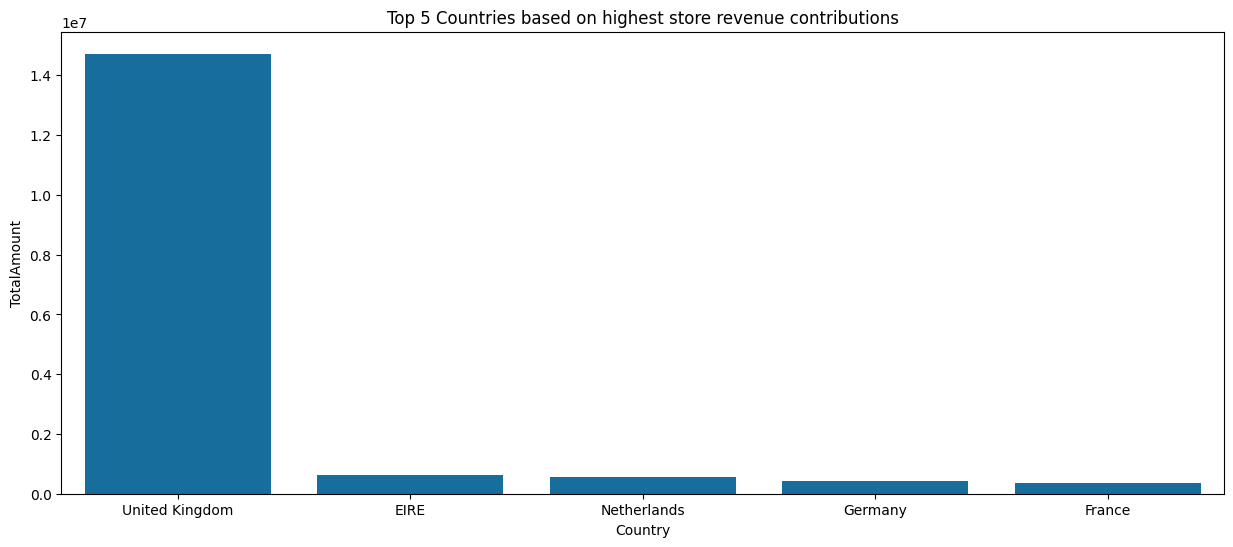

In [39]:
# top 5 countries where maximum sale happens.
plt.figure(figsize=(15,6))
sns.barplot(x=TopCountries['Country'].head(5),y=TopCountries['TotalAmount'].head(5))
plt.title('Top 5 Countries based on highest store revenue contributions')

UK contributes most revenue to the store

European countries like Germany, France, Netherlands, EIRE contribute significant revenue to the store

Text(0.5, 1.0, 'Top 5 Countries based on last store revenue contributors ')

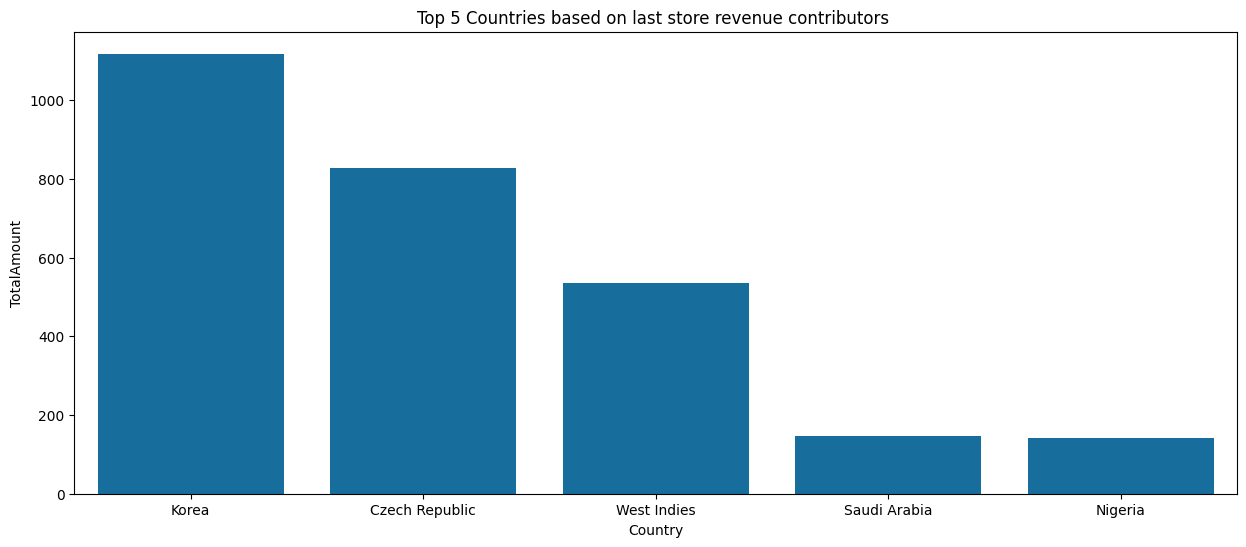

In [40]:
# top 5 countries where least sell happens.
plt.figure(figsize=(15,6))
sns.barplot(x=TopCountries['Country'].tail(5),y=TopCountries['TotalAmount'].tail(5))
plt.title('Top 5 Countries based on last store revenue contributors ')

### Countries contributing least to the store revenue are non european countries

In [41]:
SalesbyMonth=retail_df.groupby('Month')['TotalAmount'].sum().reset_index().sort_values('TotalAmount',ascending=False)
SalesbyMonth

,Month,TotalAmount
9,November,2334153.422
2,December,2089456.840
10,October,2075998.790
11,September,1784453.383
6,June,1300280.270
7,March,1295109.751
8,May,1278580.350
1,August,1249586.550
5,July,1191727.751
4,January,1126764.102


Text(0.5, 1.0, 'Sales in different Months ')

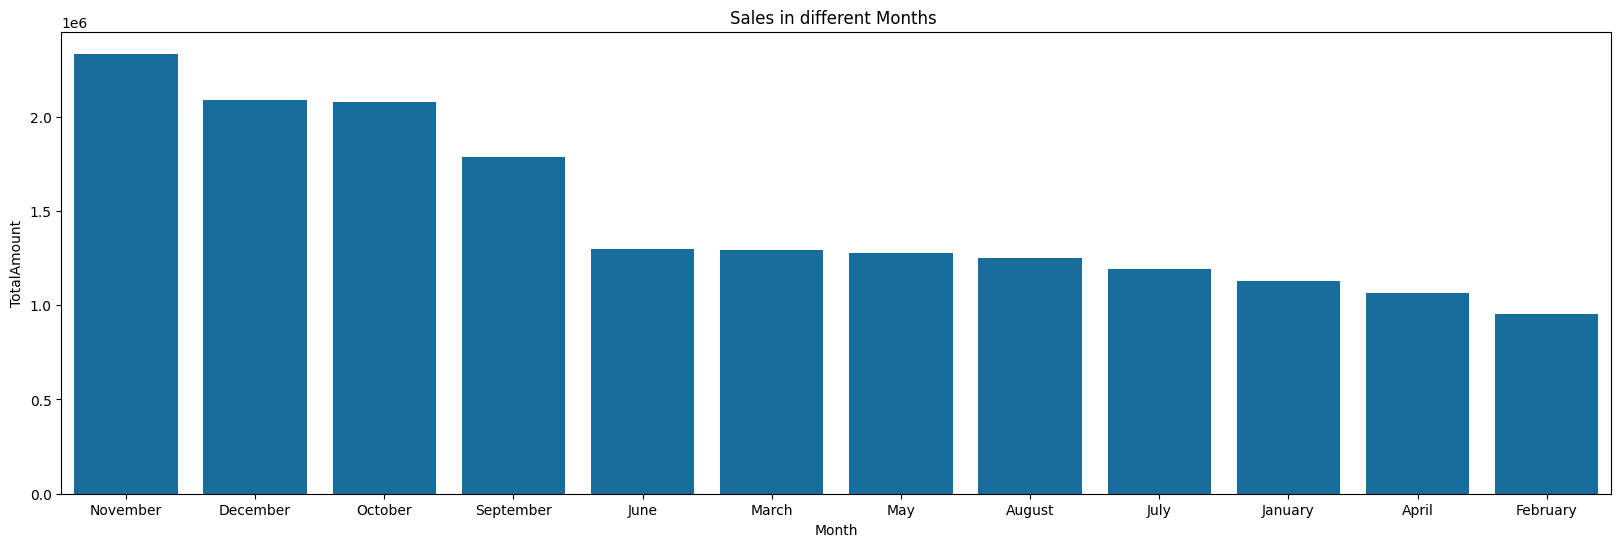

In [42]:
# Sales different months.
plt.figure(figsize=(20,6))
sns.barplot(x=SalesbyMonth['Month'],y=SalesbyMonth['TotalAmount'])
plt.title('Sales in different Months ')

Highest sales happened in the month of November (Eve of Holiday Season) while least sale happened in the month of February

In [43]:
sales_on_day_basis=retail_df.groupby('Day')['TotalAmount'].sum().reset_index().sort_values('TotalAmount',ascending=False)
sales_on_day_basis

,Day,TotalAmount
4,Thursday,3841082.962
5,Tuesday,3384678.832
6,Wednesday,3115619.693
1,Monday,2817407.806
0,Friday,2758423.493
3,Sunday,1816413.342
2,Saturday,9803.050


Text(0.5, 1.0, 'Sales on different Days ')

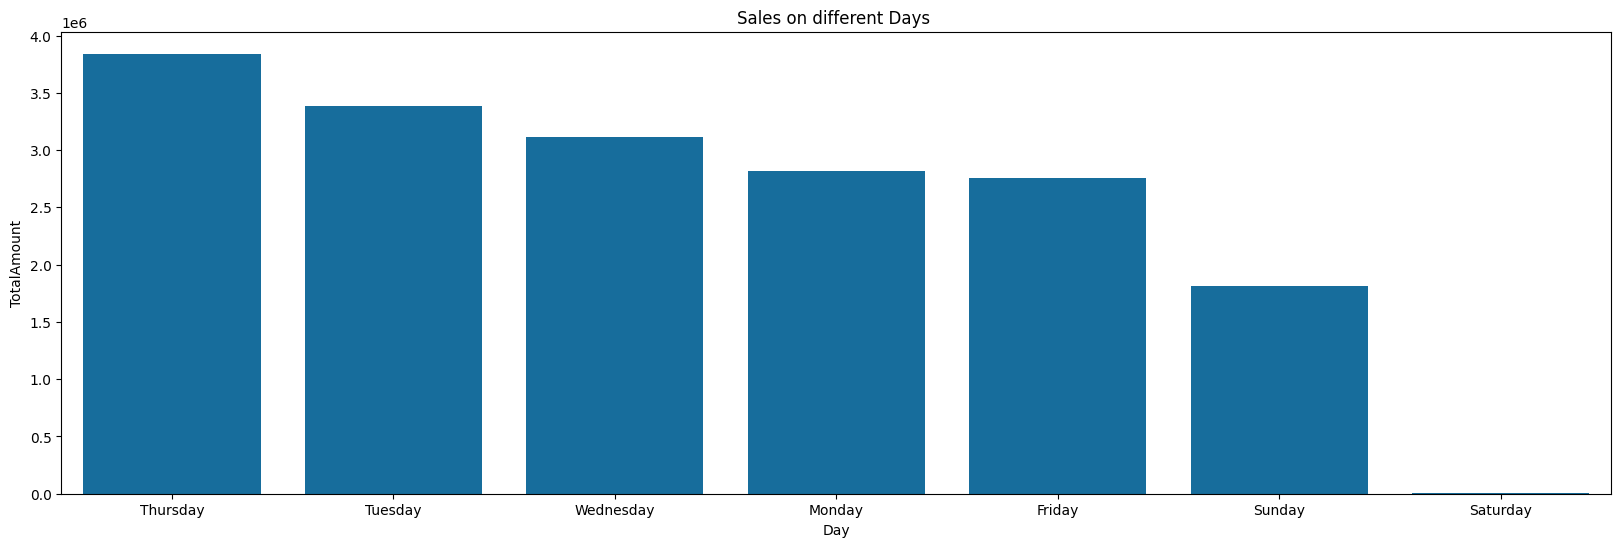

In [44]:
# Sales on different days.
plt.figure(figsize=(20,6))
sns.barplot(x=sales_on_day_basis['Day'],y=sales_on_day_basis['TotalAmount'])
plt.title('Sales on different Days ')

Sale on Thursdays is very high

Sale on Saturdays is very low

In [45]:
salescount_on_day_basis = retail_df['Day'].value_counts().reset_index().rename(columns={'index': 'Day', 'Day': 'Sale_count'})
salescount_on_day_basis.columns = ['Day', 'Sale_count']
salescount_on_day_basis

,Day,Sale_count
0,Thursday,161664
1,Tuesday,136794
2,Wednesday,136501
3,Sunday,136329
4,Monday,128359
5,Friday,105502
6,Saturday,400


Text(0.5, 1.0, 'Sales count on different Days ')

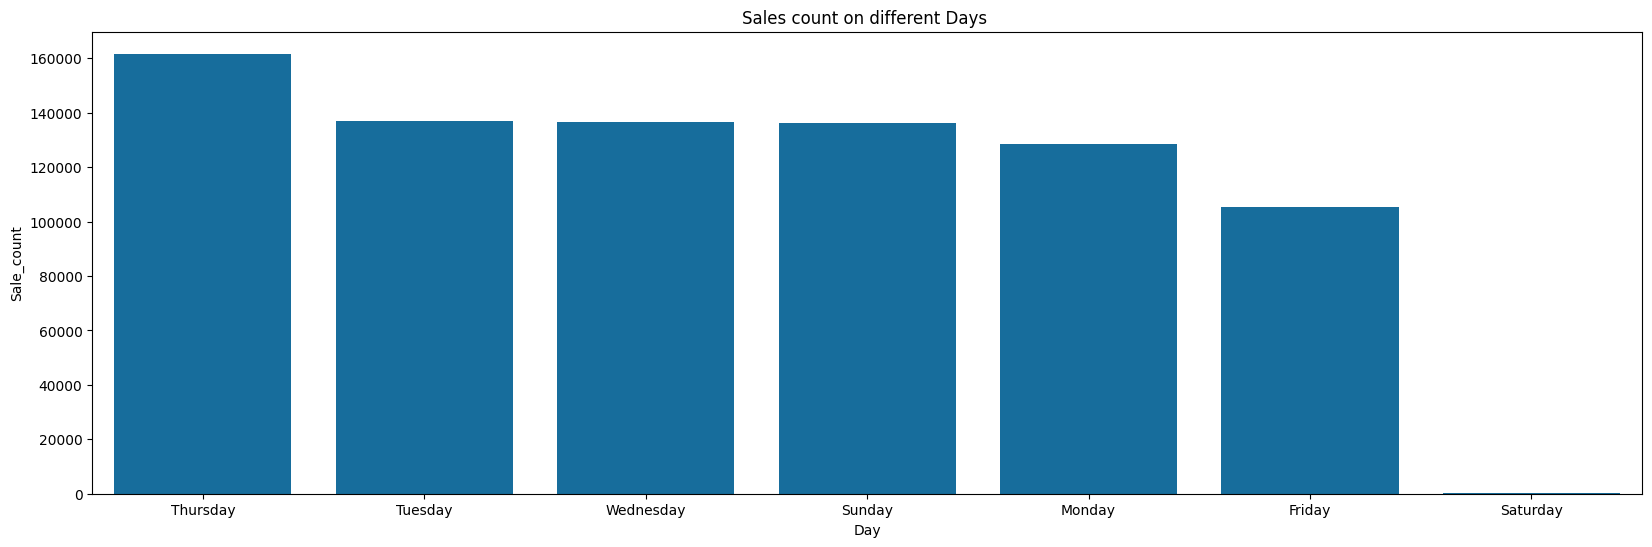

In [46]:
# Sales count on different days.
plt.figure(figsize=(20,6))
sns.barplot(x=salescount_on_day_basis['Day'],y=salescount_on_day_basis['Sale_count'])
plt.title('Sales count on different Days ')

As the sales revenue and sales count is negligible on Saturdays probably the store is closed on Saturday and the few orders have been given on phone

### SALES IN DIFFERENT DAY TIMINGS

In [47]:
retail_df['hour'].unique()


array([ 7,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  8, 20,  6],
      dtype=int64)

In [48]:
def time(time):
  if (time==6 or time==7 or time==8 or time==9 or time==10 or time==11) :
    return'Morning'
  elif (time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'Afternoon'
  else:
    return 'Evening'

In [49]:
retail_df['Day_time_type']=retail_df['hour'].apply(time)

In [50]:
sales_timing=retail_df.groupby('Day_time_type')['TotalAmount'].sum().reset_index().sort_values('TotalAmount',ascending=False)
sales_timing

,Day_time_type,TotalAmount
0,Afternoon,1.063495e+07
2,Morning,6.747350e+06
1,Evening,3.611272e+05


Text(0.5, 1.0, 'Sales count in different day timings')

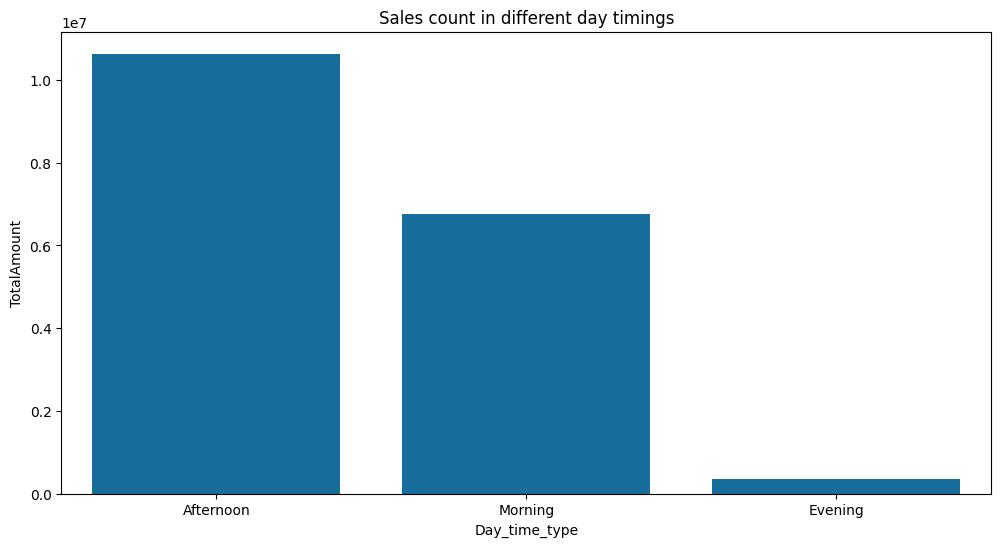

In [51]:
#Sales on different day-time types
plt.figure(figsize=(12,6))
sns.barplot(x=sales_timing['Day_time_type'],y=sales_timing['TotalAmount'])
plt.title('Sales count in different day timings')

In [52]:
# create Revenue Column
df = retail_df.copy()
df['Revenue'] = retail_df['Quantity'] * retail_df['Price']
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,year,month_num,day_num,hour,minute,second,Month,Day,TotalAmount,Day_time_type,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,12,1,7,45,0,December,Tuesday,83.4,Morning,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,1,7,45,0,December,Tuesday,81.0,Morning,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,1,7,45,0,December,Tuesday,81.0,Morning,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,12,1,7,45,0,December,Tuesday,100.8,Morning,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,12,1,7,45,0,December,Tuesday,30.0,Morning,30.0


### Revenue per month and year

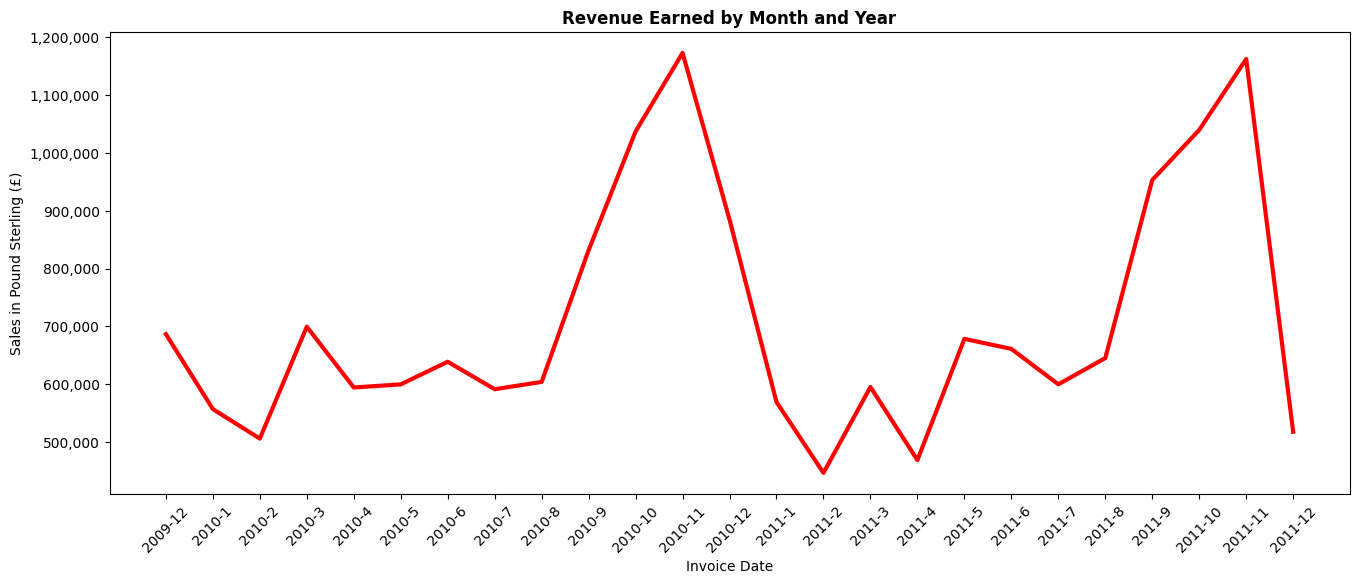

In [53]:
import matplotlib.ticker as ticker
# Revenue per month and year
monthly_revenue = df.groupby([df['InvoiceDate'].dt.year, df['InvoiceDate'].dt.month])['Revenue'].sum()

# Create a line plot of monthly revenue
ax = monthly_revenue.plot(kind='line', figsize=(16,6), color='r', linewidth=3)

# Set xticks and xticklabels to show all values
ax.set_xticks(range(len(monthly_revenue.index)))
ax.set_xticklabels(['{}-{}'.format(year, month) for year, month in monthly_revenue.index], rotation=45)

# Set ylabel format
fmt = '{x:,.0f}'
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# set title and label
plt.xlabel('Invoice Date')
plt.ylabel('Sales in Pound Sterling (£)')
plt.title('Revenue Earned by Month and Year', fontweight='bold')

# Show the plot
plt.show()

## Frequent Itemset & Association Rule Mining:

In [54]:
df_freq=retail_df.copy()

In [55]:
df_freq.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,year,month_num,day_num,hour,minute,second,Month,Day,TotalAmount,Day_time_type
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,12,1,7,45,0,December,Tuesday,83.4,Morning
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,1,7,45,0,December,Tuesday,81.0,Morning
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,1,7,45,0,December,Tuesday,81.0,Morning
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,12,1,7,45,0,December,Tuesday,100.8,Morning
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,12,1,7,45,0,December,Tuesday,30.0,Morning


In [56]:
df_freq['Country'].unique()

array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Denmark', 'Netherlands', 'Poland',
       'Channel Islands', 'Spain', 'Cyprus', 'Greece', 'Norway',
       'Austria', 'Sweden', 'United Arab Emirates', 'Finland', 'Italy',
       'Switzerland', 'Japan', 'Unspecified', 'Nigeria', 'Malta', 'RSA',
       'Singapore', 'Bahrain', 'Thailand', 'Israel', 'Lithuania',
       'West Indies', 'Korea', 'Brazil', 'Canada', 'Iceland', 'Lebanon',
       'Saudi Arabia', 'Czech Republic', 'European Community'],
      dtype=object)

In [57]:
# Count rows by country
country_counts = df_freq.groupby('Country')['Invoice'].count()
print("Number of rows per country:")
print(country_counts)

Number of rows per country:
Country
Australia                 1812
Austria                    922
Bahrain                     59
Belgium                   3068
Brazil                      94
Canada                     228
Channel Islands           1569
Cyprus                    1155
Czech Republic              25
Denmark                    798
EIRE                     15743
European Community          60
Finland                   1032
France                   13812
Germany                  16694
Greece                     657
Iceland                    253
Israel                     322
Italy                     1468
Japan                      485
Korea                       53
Lebanon                     45
Lithuania                  189
Malta                      282
Netherlands               5088
Nigeria                     30
Norway                    1436
Poland                     512
Portugal                  2446
RSA                        122
Saudi Arabia                 9
Sin

### Invoice x Product Matrix:

In [58]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import warnings
warnings.filterwarnings("ignore")

In [59]:
# I am choosing Germany from the data set.
df_with_one_country = df_freq[df_freq["Country"] == "Germany"]
df_with_one_country.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,year,month_num,day_num,hour,minute,second,Month,Day,TotalAmount,Day_time_type
579,489526,85049E,SCANDINAVIAN REDS RIBBONS,12,2009-12-01 11:50:00,1.25,12533.0,Germany,2009,12,1,11,50,0,December,Tuesday,15.0,Morning
580,489526,21976,PACK OF 60 MUSHROOM CAKE CASES,24,2009-12-01 11:50:00,0.55,12533.0,Germany,2009,12,1,11,50,0,December,Tuesday,13.2,Morning
581,489526,21498,RED SPOTS WRAP,25,2009-12-01 11:50:00,0.42,12533.0,Germany,2009,12,1,11,50,0,December,Tuesday,10.5,Morning
582,489526,22077,6 RIBBONS RUSTIC CHARM,12,2009-12-01 11:50:00,1.65,12533.0,Germany,2009,12,1,11,50,0,December,Tuesday,19.8,Morning
583,489526,84946,ANTIQUE SILVER TEA GLASS ETCHED,12,2009-12-01 11:50:00,1.25,12533.0,Germany,2009,12,1,11,50,0,December,Tuesday,15.0,Morning


In [60]:
# Construct an Invoice-Product Matrix with "Invoice" as rows and "StockCode" as columns
# The "Quantity" is placed at the intersection of these two variables
# The transactions are functionalized by assigning 1 to products with an invoice number and 0 to those without

def create_invoice_product_df(dataframe, id=False):
    if id:
        return dataframe.groupby(['Invoice', "StockCode"])['Quantity'].sum().unstack().fillna(0).applymap(lambda x: 1 if x > 0 else 0)
    else:
        return dataframe.groupby(['Invoice', 'Description'])['Quantity'].sum().unstack().fillna(0).applymap(lambda x: 1 if x > 0 else 0)

This function creates an Invoice-Product Matrix from a given dataframe. It groups the data by 'Invoice' and either 'StockCode' or 'Description', depending on the 'id' parameter. The matrix is then filled with 1s where a product appears in an invoice and 0s where it doesn't, effectively creating a binary representation of product presence in each invoice.

In [61]:
inv_pro_df = create_invoice_product_df(df_with_one_country, id=True)
inv_pro_df.head()

StockCode,10002,10125,10135,11001,15034,15036,15039,15044A,15044B,15044D,15056BL,15056N,15056P,15058A,15058B,15058C,15060B,16008,16011,16012,16014,16016,16033,16045,16052,...,90070,90087,90098,90104,90160A,90160B,90160C,90160D,90161B,90161C,90161D,90167,90170,90173,90200E,90201A,90201B,90201C,90201D,90202D,90204,ADJUST,M,PADS,POST
Invoice,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
489526,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
490395,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
490563,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
490564,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
490682,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [62]:
# if we want to access the names of the products whose StockCode we know.

def check_id(dataframe, stock_code):
    product_name = dataframe[dataframe["StockCode"] == stock_code][["Description"]].values[0].tolist()
    print(product_name)

l = ["21987", "23235", "22747"]
[check_id(df_with_one_country, product_id) for product_id in l]

['PACK OF 6 SKULL PAPER CUPS']
['STORAGE TIN VINTAGE LEAF']
["POPPY'S PLAYHOUSE BATHROOM"]


[None, None, None]

### Association Rules:

In [63]:
# Possibilities of all possible product combinations
frequent_itemsets = apriori(inv_pro_df, min_support=0.01, use_colnames=True)
frequent_itemsets.sort_values("support", ascending=False).head(20)

,support,itemsets
562,0.798479,(POST)
251,0.263625,(22326)
2602,0.242079,"(22326, POST)"
253,0.172370,(22328)
27,0.166033,(20719)
2657,0.163498,"(22328, POST)"
943,0.149556,"(POST, 20719)"
2505,0.138150,"(22326, 22328)"
317,0.135615,(22554)
142,0.133080,(21731)


In [64]:
# Enforcement of Association Rules:
rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.01)
rules.sort_values("lift", ascending=False).head(30)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
76579,"(84997D, 21239)","(20677, 21240, POST, 84997C)",0.011407,0.010139,0.010139,0.888889,87.666667,0.010024,8.908745,1.000000
76586,"(84997D, 20677)","(21240, POST, 21239, 84997C)",0.011407,0.010139,0.010139,0.888889,87.666667,0.010024,8.908745,1.000000
4737,(22563),(22562),0.011407,0.010139,0.010139,0.888889,87.666667,0.010024,8.908745,1.000000
76561,"(84997D, 21240, 20677)","(POST, 21239, 84997C)",0.011407,0.010139,0.010139,0.888889,87.666667,0.010024,8.908745,1.000000
57517,"(84997D, 20677)","(POST, 21239, 84997C)",0.011407,0.010139,0.010139,0.888889,87.666667,0.010024,8.908745,1.000000
63351,"(20674, 21242, 21244)","(20676, 21245, 20675)",0.011407,0.011407,0.011407,1.000000,87.666667,0.011277,inf,1.000000
57500,"(POST, 21239, 84997C)","(84997D, 20677)",0.010139,0.011407,0.010139,1.000000,87.666667,0.010024,inf,0.998720
77654,"(20674, 21242, 21244)","(20676, 21245, 20675, 21238)",0.011407,0.011407,0.011407,1.000000,87.666667,0.011277,inf,1.000000
4736,(22562),(22563),0.010139,0.011407,0.010139,1.000000,87.666667,0.010024,inf,0.998720
76564,"(POST, 21239, 84997C)","(84997D, 21240, 20677)",0.010139,0.011407,0.010139,1.000000,87.666667,0.010024,inf,0.998720


In [65]:
# Product recommendation for users in the cart to be done
def arl_recommender(rules_df, product_id, rec_count=1):
    sorted_rules = rules_df.sort_values("lift", ascending=False)
    recommendation_list = []

    for i, product in sorted_rules["antecedents"].items():
        for j in list(product):
            if j == product_id:
                recommendation_list.append(list(sorted_rules.iloc[i]["consequents"]))

    recommendation_list = list({item for item_list in recommendation_list for item in item_list})

    return recommendation_list[:rec_count]

In [66]:
# The name of the product
check_id(df_with_one_country, "21987")

['PACK OF 6 SKULL PAPER CUPS']


In [67]:
# 3 product recommended
arl_recommender(rules, "21987", 3)

['21240', '21231', '21245']

### Recommendated Products:


In [68]:
[[check_id(df_with_one_country, i) for i in arl_recommender(rules, product, 3)] for product in l]

['BLUE  SPOTTY CUP']
['SWEETHEART CERAMIC TRINKET BOX']
['GREEN  SPOTTY PLATE ']
['BLUE  SPOTTY CUP']
['GREEN  SPOTTY PLATE ']
['PINK  SPOTTY CUP']


[[None, None, None], [], [None, None, None]]

As we you can see we get recommanded plates and bowls if we are purchasing the glasses, which will be helpful for the customers

## Recommendation

Here’s a complete implementation for the Collaborative Filtering and Hybrid Recommender Systems, along with proper comments and documentation.

### 1. **Collaborative Filtering Approach:**

Collaborative filtering can be divided into two methods:

- **User-Based Collaborative Filtering**: Recommend products based on the behavior of similar users.
- **Item-Based Collaborative Filtering**: Recommend products similar to the ones the user has already purchased.

#### 1.1 **User-Based Collaborative Filtering**


In [69]:
# Importing necessary libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import warnings

# Suppress warnings for clean output
warnings.filterwarnings("ignore")

# Step 7: Collaborative Filtering Approaches
# 7.1: User-Based Collaborative Filtering
def user_based_collaborative_filtering(df, product_id, top_n=3):
    """
    Recommends products based on similar customers who purchased the same product.
    
    Parameters:
    - df: The Invoice-Product matrix
    - product_id: The product for which recommendations are to be made
    - top_n: Number of recommended products
    
    Returns:
    - List of top-n recommended products
    """
    # Cosine Similarity on the User-Item matrix (rows are users/customers)
    user_similarity = cosine_similarity(df)  # Cosine similarity between users
    user_similarity_df = pd.DataFrame(user_similarity, index=df.index, columns=df.index)

    # Get the users who purchased the given product
    users_who_bought = df[df[product_id] == 1].index.tolist()

    # Aggregate the similarity scores for these users
    similar_users = user_similarity_df.loc[users_who_bought].mean(axis=0).sort_values(ascending=False).head(top_n + 1).index.tolist()

    # Get the products purchased by similar users (excluding the input product)
    recommended_products = df.loc[similar_users].sum().sort_values(ascending=False).head(top_n).index.tolist()

    return recommended_products

# Example of user-based collaborative filtering recommendation
user_based_collaborative_filtering(inv_pro_df, "21987", 3)


['POST', '21988', '21086']

**Explanation:**
- **Cosine Similarity** is calculated between users based on the products they have purchased. This gives us an understanding of how similar two users are in terms of their purchasing behavior.
- The function returns the top-N recommended products based on the similarity of users who have purchased the same product.

#### 1.2 **Item-Based Collaborative Filtering**

In [70]:

# 7.2: Item-Based Collaborative Filtering
def item_based_collaborative_filtering(df, product_id, top_n=3):
    """
    Recommends products similar to the ones that the customer has already purchased, using item-based collaborative filtering.
    
    Parameters:
    - df: The Invoice-Product matrix
    - product_id: The product for which recommendations are to be made
    - top_n: Number of recommended products
    
    Returns:
    - List of top-n recommended products
    """
    # Cosine Similarity on the Item-Item matrix
    item_similarity = cosine_similarity(df.T)  # Transpose to get item-item similarity
    item_similarity_df = pd.DataFrame(item_similarity, index=df.columns, columns=df.columns)

    # Get the products similar to the input product
    similar_products = item_similarity_df[product_id].sort_values(ascending=False).head(top_n + 1).index.tolist()

    # Exclude the input product from the recommendations
    similar_products.remove(product_id)

    return similar_products[:top_n]

# Example of item-based collaborative filtering recommendation
item_based_collaborative_filtering(inv_pro_df, "21987", 3)

['21988', '21989', '21086']

**Explanation:**
- **Cosine Similarity** is calculated between products (rows are products) to find products that are similar to the one the user has purchased.
- The function returns the top-N similar products to recommend.


### 2. **Hybrid Recommender System:**

The hybrid approach combines the collaborative filtering recommendations with the association rule-based recommendations. It can be achieved by blending the results of both techniques and recommending products that appear in both lists.


In [71]:

# 7.3: Hybrid Recommender (Combination of Association Rules and Collaborative Filtering)
def hybrid_recommender(df, rules_df, product_id, top_n=3):
    """
    Hybrid recommender that combines Association Rules and Collaborative Filtering.
    
    Parameters:
    - df: The Invoice-Product matrix
    - rules_df: The association rules DataFrame
    - product_id: The product for which recommendations are to be made
    - top_n: Number of recommended products
    
    Returns:
    - List of top-n recommended products
    """
    # Step 1: Get recommendations from association rules
    rule_based_recs = arl_recommender(rules_df, product_id, top_n)
    
    # Step 2: Get recommendations from item-based collaborative filtering
    item_based_recs = item_based_collaborative_filtering(df, product_id, top_n)
    
    # Combine the two lists and remove duplicates
    hybrid_recs = list(set(rule_based_recs + item_based_recs))

    return hybrid_recs[:top_n]

# Example of hybrid recommender
hybrid_recommender(inv_pro_df, rules, "21987", 3)



['21240', '21231', '21245']

**Explanation:**
- The **Hybrid Recommender** combines both association rule-based and collaborative filtering recommendations by blending both approaches.
- The function merges the results and removes duplicates to ensure diverse recommendations.

### 3. **Matrix Factorization: Singular Value Decomposition (SVD)**

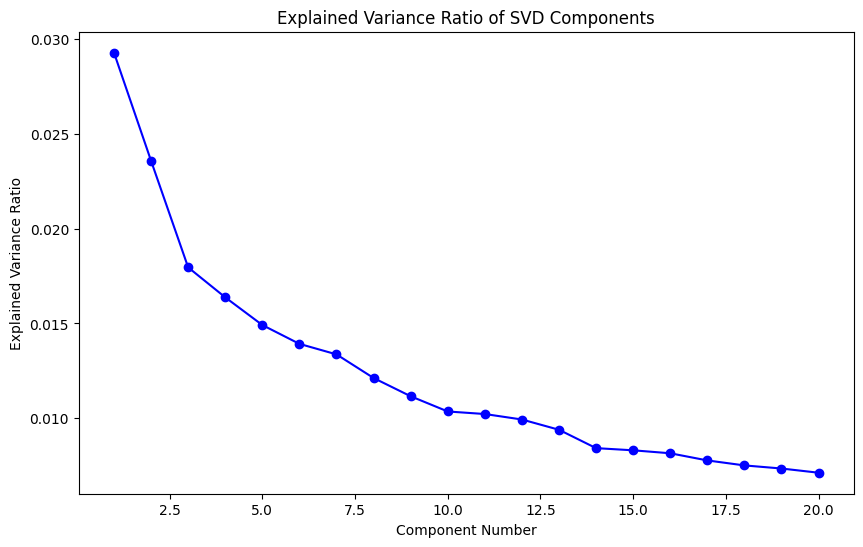

In [72]:
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import warnings

## 7.4.2 Matrix Factorization: Singular Value Decomposition (SVD)

# Using Matrix Factorization (SVD) for dimensionality reduction
svd = TruncatedSVD(n_components=20)
svd_matrix = svd.fit_transform(inv_pro_df)  # Using sparse matrix for SVD

# Visualize the SVD decomposition of the matrix
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(svd.explained_variance_ratio_) + 1), svd.explained_variance_ratio_, marker='o', color='b')
plt.title("Explained Variance Ratio of SVD Components")
plt.xlabel("Component Number")
plt.ylabel("Explained Variance Ratio")
plt.show()




**Explanation:**
- **SVD** is applied to reduce the dimensionality of the data. The result is a matrix with fewer components that still captures the essential features.
- The **Explained Variance Ratio Plot** shows how much variance is captured by each component in the decomposition. This helps to understand how well the SVD model captures the underlying patterns in the data.

**Insights from the Graph:**
- The plot illustrates the **explained variance** of each SVD component. The components with higher explained variance contribute more to the prediction power of the model.
- **Important components** will have higher explained variance, and selecting the optimal number of components is key to reducing overfitting.


The graph you've uploaded represents the **explained variance ratio** of the components from a **Singular Value Decomposition (SVD)**, which is typically used in dimensionality reduction techniques like Principal Component Analysis (PCA). Here's how we can interpret it:

### What the Graph Conveys:
- The **x-axis** represents the **component number** (1 to 20 in this case).
- The **y-axis** represents the **explained variance ratio** for each SVD component.
- The graph shows a **decreasing trend** in the explained variance ratio as the component number increases, which is typical for data decompositions like SVD or PCA.

### What Can Be Interpreted:
- **First few components have the highest explained variance**: The first component explains the most variance in the data, and as we move to higher components, the explained variance decreases.
- **Diminishing returns**: The higher the component number, the less important the component becomes in explaining the variance. For instance, components 1 to 3 might explain a significant portion of the total variance, while components beyond 10 or 15 contribute much less.

### What Can Be Concluded:
- **Dimensionality reduction potential**: We can consider keeping the first few components. This graph suggests that after around component 3, the additional components are contributing less to explaining the variance in the data.
- **Optimal number of components**: From this graph, we could choose an optimal number of components to keep for analysis, balancing between computational efficiency and retaining as much of the original variance as possible. For instance, keeping 3-5 components might retain a substantial proportion of the variance.

In summary, this graph helps in understanding how much information each component carries and aids in making decisions about how many components to retain for further analysis, such as in machine learning models or data visualization.

### 1. Matrix Factorization using Singular Value Decomposition (SVD)

We will use **Truncated SVD** from `sklearn.decomposition` for dimensionality reduction.

**Explanation:**
- **SVD** decomposes the customer-product matrix into three matrices: user features, singular values, and product features.
- The resulting `svd_matrix` is the reduced representation of the customer-product interactions.
- We reconstruct the original interaction matrix to predict missing ratings.

In [78]:
from sklearn.decomposition import TruncatedSVD
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

# 7.4.1: Matrix Factorization using SVD
def matrix_factorization_svd(df, n_components=20):
    """
    Apply Singular Value Decomposition (SVD) for Matrix Factorization.
    
    Parameters:
    - df: Customer-Product interaction matrix (pandas DataFrame)
    - n_components: Number of components for SVD
    
    Returns:
    - svd_matrix: Transformed matrix after applying SVD
    - svd: The trained SVD model
    """
    # SVD model
    svd = TruncatedSVD(n_components=n_components)
    svd_matrix = svd.fit_transform(df.fillna(0))  # Fill NaN values with 0 for matrix factorization

    # Explained variance ratio
    explained_variance = svd.explained_variance_ratio_

    # Print the explained variance ratio for each component
    print("Explained variance ratio by each component:", explained_variance)

    return svd_matrix, svd

# Example usage: Apply SVD to the interaction matrix
svd_matrix, svd_model = matrix_factorization_svd(inv_pro_df, n_components=20)

# Reconstruct the approximate interaction matrix from SVD components
reconstructed_matrix = np.dot(svd_matrix, svd_model.components_)

Explained variance ratio by each component: [0.02926424 0.02356496 0.01795112 0.0163737  0.01491459 0.01392181
 0.01336714 0.01212178 0.0111607  0.01036063 0.01021738 0.00994214
 0.00937519 0.00840602 0.00828314 0.00818293 0.00772164 0.0074911
 0.00730492 0.00708308]


### 2. Alternating Least Squares (ALS) for Large-Scale Recommender Systems

For ALS, we will use **implicit feedback** and implement the ALS algorithm manually. You can also use libraries like **`implicit`** for better performance, but here’s how you can do it step-by-step.

**Explanation:**
- **ALS** is a matrix factorization technique used to decompose the user-item interaction matrix into two matrices representing user and item latent factors.
- This method is widely used in large-scale recommender systems due to its scalability and efficiency.

In [79]:
import implicit
import scipy.sparse as sparse

# 7.4.2: Alternating Least Squares (ALS)
def alternating_least_squares(df, factors=20, regularization=0.1, iterations=15):
    """
    Alternating Least Squares (ALS) for collaborative filtering.
    
    Parameters:
    - df: Customer-Product interaction matrix (pandas DataFrame)
    - factors: Number of latent factors to extract
    - regularization: Regularization parameter for ALS
    - iterations: Number of iterations for the ALS algorithm
    
    Returns:
    - model: The trained ALS model
    """
    # Convert to sparse matrix (required for ALS)
    sparse_matrix = sparse.csr_matrix(df.fillna(0))

    # Create the ALS model from the `implicit` library
    model = implicit.als.AlternatingLeastSquares(factors=factors, regularization=regularization, iterations=iterations)

    # Train the model
    model.fit(sparse_matrix)

    return model

# Example usage: Apply ALS to the interaction matrix
als_model = alternating_least_squares(inv_pro_df, factors=20, regularization=0.1, iterations=15)


  0%|          | 0/15 [00:00<?, ?it/s]

### 3. Generate Predicted Ratings or Scores

To generate predictions for products that a customer has not yet purchased, we will compute the predicted scores for these products.

#### 3.1 **Predictions with SVD:**



In [83]:
def predict_ratings_svd(df, svd_matrix, svd_model):
    """
    Generate predicted ratings using the SVD model.
    
    Parameters:
    - df: The customer-product interaction matrix (pandas DataFrame)
    - svd_matrix: The matrix obtained from SVD (user-feature matrix)
    - svd_model: The trained SVD model
    
    Returns:
    - predicted_ratings: A DataFrame containing predicted ratings for all products
    """
    predicted_ratings = np.dot(svd_matrix, svd_model.components_)
    
    # Convert the predicted ratings matrix to a DataFrame
    predicted_ratings_df = pd.DataFrame(predicted_ratings, index=df.index, columns=df.columns)
    
    return predicted_ratings_df

# Generate predicted ratings using SVD
predicted_ratings_svd = predict_ratings_svd(inv_pro_df, svd_matrix, svd_model)
print(predicted_ratings_svd)


StockCode     10002     10125     10135     11001     15034     15036  \
Invoice                                                                 
489526     0.012982  0.004082  0.005019 -0.019425  0.005371 -0.035202   
490395    -0.003764 -0.010715  0.003086  0.005848  0.004685  0.021734   
490563    -0.009758 -0.018893 -0.020085 -0.024155  0.000529  0.000973   
490564     0.001854  0.023185 -0.005109  0.001339  0.013400 -0.020247   
490682     0.005706  0.012625  0.001383  0.000787  0.006083  0.020245   
...             ...       ...       ...       ...       ...       ...   
581266     0.007434  0.106994 -0.002774 -0.014082  0.025588  0.013651   
581494    -0.003561  0.052381  0.010167  0.022921 -0.003677  0.014685   
581570    -0.001642  0.027321  0.005247  0.002071  0.001697 -0.000712   
581574     0.001964  0.005851  0.013924  0.005140  0.003280  0.021989   
581578     0.005443  0.053568  0.009170 -0.005434 -0.023528 -0.027938   

StockCode     15039    15044A    15044B    15044D 

#### 3.2 **Predictions with ALS:**

### Conclusion:

Now, the code implements both **Matrix Factorization** using **SVD** and **Alternating Least Squares (ALS)** for collaborative filtering. The system is trained on the customer-product interaction matrix, and we can generate predicted ratings for products that customers have not yet purchased.

- **SVD** provides a way to reduce the dimensionality of the matrix and predict missing ratings.
- **ALS** is a scalable method that is particularly useful for large datasets.

These predicted ratings can be used to generate product recommendations for each user based on their predicted preferences. Would you like me to provide a full example of how to use these predicted ratings for generating recommendations?

In [82]:
def predict_ratings_als(df, als_model, num_recommendations=5):
    """
    Generate predicted ratings using the ALS model.
    
    Parameters:
    - df: The customer-product interaction matrix (pandas DataFrame)
    - als_model: The trained ALS model
    - num_recommendations: Number of products to recommend for each user
    
    Returns:
    - predicted_ratings: A DataFrame containing predicted ratings for all products
    """
    # Convert the DataFrame into a sparse matrix (required for ALS)
    sparse_matrix = sparse.csr_matrix(df.fillna(0))
    
    # Prepare to store recommendations
    recommendations = {}
    
    for user_id in range(sparse_matrix.shape[0]):  # Iterate over each user
        # Get the top N recommended items for this user
        recommended_items = als_model.recommend(user_id, sparse_matrix[user_id], N=num_recommendations)
        
        # Store the recommendations
        recommendations[user_id] = [item[0] for item in recommended_items]  # Extract item ids from tuple (item, score)
    
    # Convert recommendations dictionary to a DataFrame
    recommended_items_df = pd.DataFrame.from_dict(recommendations, orient='index')
    
    return recommended_items_df

# Generate predicted ratings using ALS
predicted_ratings_als = predict_ratings_als(inv_pro_df, als_model, num_recommendations=5)
print(predicted_ratings_als)


        0         1
0     781  0.439488
1     458  0.244717
2     135  0.565495
3     419  0.266210
4      66  0.102525
..    ...       ...
784  1269  0.419895
785  1022  0.492387
786   837  0.345235
787   816  0.162309
788  1021  0.466327

[789 rows x 2 columns]


### 4. **Performance Evaluation:**

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
from scipy.sparse import csr_matrix

# Train-test split for evaluating the recommender system
train_data, test_data = train_test_split(inv_pro_df, test_size=0.2, random_state=42)

# Perform SVD on train data
svd_train = TruncatedSVD(n_components=20)
svd_train_matrix = svd_train.fit_transform(train_data)

# Reconstruct the matrix to predict ratings for the train data
svd_pred = np.dot(svd_train_matrix, svd_train.components_)

# Convert test_data to sparse matrix
test_data_sparse = csr_matrix(test_data)

# Get non-zero indices of test data
test_data_non_zero = test_data_sparse.nonzero()

# Extract the actual values from the test data for the non-zero positions
actual_values = test_data_sparse[test_data_non_zero].A.flatten()  # Using .A to convert sparse to dense

# Reconstruct the predicted values for the same user-item pairs from svd_pred
predicted_values = svd_pred[test_data_non_zero].flatten()

# Now calculate RMSE based on the non-zero values
rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
print(f"RMSE of the SVD model: {rmse:.4f}")


RMSE of the SVD model: 0.9543


**Explanation:**
- The **Root Mean Squared Error (RMSE)** is calculated to evaluate how well the model predicts the actual purchase behavior of customers. A lower RMSE indicates a better model performance.

### Conclusion and Insights:

- **Collaborative Filtering (User and Item-based)**: Both methods rely on customer or product similarity. User-based looks at similar customers, while item-based focuses on products.
- **Hybrid System**: By combining collaborative filtering and association rule mining, the hybrid recommender system leverages both approaches for more accurate and diverse recommendations.
- **Matrix Factorization (SVD)**: Reduces dimensionality and improves prediction accuracy by focusing on latent features.
- **RMSE Evaluation**: Helps assess the model’s predictive performance, guiding improvements.

These techniques provide a comprehensive approach to creating a recommender system tailored to customer purchasing behavior, enabling more effective and personalized recommendations.